In [ ]:
import numpy as np
import scipy.linalg as spl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['font.size']=20
plt.rcParams["text.usetex"]=True

## Class that defines the free energy

Free energy expression for the bulk free energy:

$F[c,m] = \int dV \Big(\frac{\alpha}{4}(c-c_0)^4 + \frac{\beta}{2}(c-c_0)^2 + \frac{\lambda}{2}m^2 + \gamma mc\Big)$

The chemical potentials are:

$\mu_c = \alpha(c-c_0)^3 + \beta (c-c_0) + \gamma m $

$\mu_m = \lambda m + \gamma c$

The Jacobian matrix is:

$$
J = \begin{bmatrix} 3\alpha(c-c_0)^2 + \beta & \gamma \\ \gamma & \lambda \end{bmatrix}
$$

In [ ]:
class free_energy_1:
    """
    Class that defines a Landau expression for free energy as a functional of the species concentrations M and C.
    It also contains function that helps calculate the:
    1. Chemical potential
    2. Jacobian matrix
    3. Regions of instability
    4. Coexistence concentrations
    """
    
    def __init__(self, parameters):
        """
        Function that initializes the free energy object with parameters.
        
        :input parameters: A dictionary that contains the parameters :math:``\alpha, \beta, \gamma, \lambda, \c_0``
        :type parameters: dict
        """
        self.alpha = parameters['alpha']
        self.beta = parameters['beta']
        self.gamma = parameters['gamma']
        self.lamda = parameters['lamda']
        self.c_0 = parameters['c_0']
        
    def calculate_fe(self, concentrations):
        """
        Function that calculates and returns the free energy per unit volume for a given value of species concentrations c and m
        
        :input concentrations: A 2x1 vector containing the species concentrations, of the form [c,m]'
        :type concentrations: 2x1 numpy array
        :return fe: Free energy pre unit volume computed from the supplied value of concentrations
        :rtype fe: float
        """
        c = concentrations[0]
        m = concentrations[1]
        fe = 0.25*self.alpha*(c-self.c_0)**4 + 0.5*self.beta*(c-self.c_0)**2 + 0.5*self.lamda*m**2 + self.gamma*m*c
        return fe
    
    def calculate_chemical_potentials(self, concentrations):
        """
        Function that calculates and returns the chemical potentials for a given value of species concentrations c and m
        
        :input concentrations: A 2x1 vector containing the species concentrations, of the form [c,m]'
        :type concentrations: 2x1 numpy array
        :return mu: A 2x1 vector of chemical potentials computed from the supplied value of concentrations, of the form [mu_c, mu_m]''
        :rtype mu: 2x1 numpy array
        """
        c = concentrations[0]
        m = concentrations[1]
        mu_c = self.alpha*(c-self.c_0)**3 + self.beta*(c-self.c_0) + self.gamma*m
        mu_m = self.lamda*m + self.gamma*c
        return np.array([mu_c, mu_m]).transpose()
    
    def calculate_jacobian(self, concentrations):
        """
        Function that calculates and returns the chemical potentials for a given value of species concentrations c and m
        
        :input concentrations: A 2x1 vector containing the species concentrations, of the form [c,m]'
        :type concentrations: 2x1 numpy array
        :return J: A 2x2 matrix that is the jacobian of the system, cmputed from the supplied value of concentrations
        :rtype J: 2x2 numpy array
        """
        c = concentrations[0]
        m = concentrations[1]
        J = np.zeros([2,2])
        J[0,0] = 3*self.alpha*(c-self.c_0)**2 + self.beta
        J[0,1] = self.gamma
        J[1,0] = self.gamma
        J[1,1] = self.lamda
        return J

## Analyze the Landau expression for different parameters

Cases to explore:
1. $\lambda > 0, \beta < \gamma^2/\lambda $
2. $\lambda > 0, \beta > \gamma^2/\lambda $
3. $\lambda < 0$ 


### Case 1: $\lambda>0, \beta < \gamma^2/\lambda$

In [ ]:
%matplotlib inline

parameters = {'c_0': 1.0,
              'alpha': 10.0,
              'beta': 1.0,
              'gamma': 2.0,
              'lamda': 1.0}

fe1_obj = free_energy_1(parameters)

# concentration ranges:
n_points_c = 20
c_min = 0.0
c_max = 2.0
n_points_m = 20
m_min = 0.0
m_max = 2.0
c_range = np.linspace(c_min, c_max, n_points_c)
m_range = np.linspace(m_min, m_max, n_points_m)
C, M = np.meshgrid(c_range, m_range)

# calculate free energy:
fe = fe1_obj.calculate_fe([C, M])
# plot the free energy:
fig, axs = plt.subplots(1,1,figsize=(7,7))
axs = Axes3D(fig)  
surf = axs.plot_surface(C, M, fe, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
axs.set_title("Free energy", fontsize=20)
axs.set_xlabel('[c]', fontsize=20)
axs.set_ylabel('[m]', fontsize=20)
axs.set_zlabel('FE', fontsize=20)

# Compute regions of instability

instability = np.zeros([n_points_c, n_points_m])

for i in range(n_points_c):
    for j in range(n_points_m):
        J = fe1_obj.calculate_jacobian([C[i,j],M[i,j]])
        eigenvalues = spl.eigvals(J)
        if eigenvalues[0] < 0.0 or eigenvalues[1] < 0.0:
            instability[i,j] = 1.0
        else:
            instability[i,j] = 0.0

fig, axs = plt.subplots(1,1,figsize=(5,5))

stability = axs.contourf(C, M, instability, levels=[0.5,1.5], colors=['red','blue'])
axs.set_title("Regions of instability", fontsize=20)
axs.set_xlabel('[c]', fontsize=20)
axs.set_ylabel('[m]', fontsize=20)
plt.show()

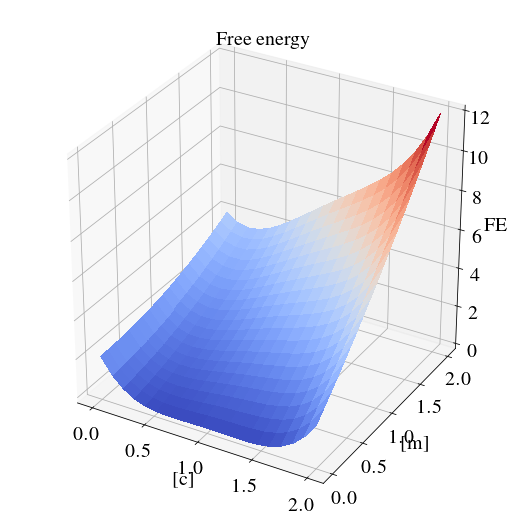

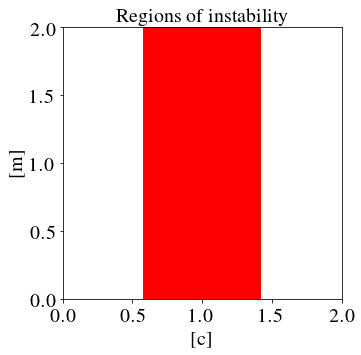

In [10]:
%matplotlib inline

parameters = {'c_0': 1.0,
              'alpha': 10.0,
              'beta': -1.0,
              'gamma': 2.0,
              'lamda': 1.0}

fe1_obj = free_energy_1(parameters)

# concentration ranges:
n_points_c = 20
c_min = 0.0
c_max = 2.0
n_points_m = 20
m_min = 0.0
m_max = 2.0
c_range = np.linspace(c_min, c_max, n_points_c)
m_range = np.linspace(m_min, m_max, n_points_m)
C, M = np.meshgrid(c_range, m_range)

# calculate free energy:
fe = fe1_obj.calculate_fe([C, M])
# plot the free energy:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)  
surf = ax.plot_surface(C, M, fe, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title("Free energy", fontsize=20)
ax.set_xlabel('[c]', fontsize=20)
ax.set_ylabel('[m]', fontsize=20)
ax.set_zlabel('FE', fontsize=20)
plt.show()

# Compute regions of instability

instability = np.zeros([n_points_c, n_points_m])

for i in range(n_points_c):
    for j in range(n_points_m):
        J = fe1_obj.calculate_jacobian([C[i,j],M[i,j]])
        eigenvalues = spl.eigvals(J)
        if eigenvalues[0] < 0.0 or eigenvalues[1] < 0.0:
            instability[i,j] = 1.0
        else:
            instability[i,j] = 0.0
            
fig, ax = plt.subplots(1,1,figsize=(5,5))
surf = ax.contourf(C, M, instability, levels=[0.5,1.5], colors=['red','blue'])
ax.set_title("Regions of instability", fontsize=20)
ax.set_xlabel('[c]', fontsize=20)
ax.set_ylabel('[m]', fontsize=20)
plt.show()

### Case 2: $\lambda>0, \beta > \gamma^2/\lambda$

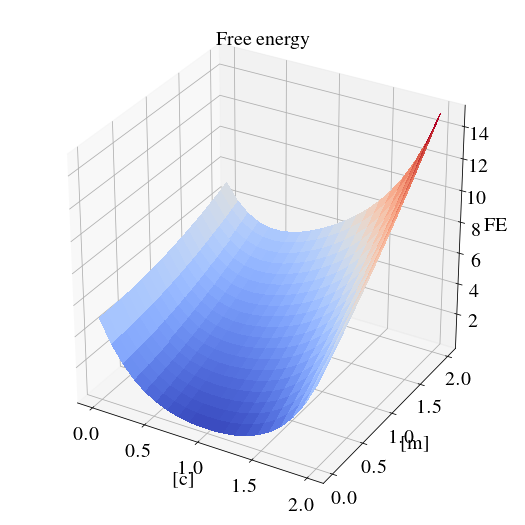

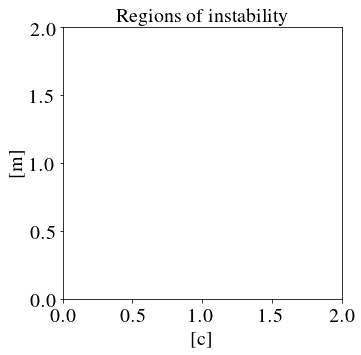

In [11]:
%matplotlib inline

parameters = {'c_0': 1.0,
              'alpha': 10.0,
              'beta': 5.0,
              'gamma': 2.0,
              'lamda': 1.0}

fe1_obj = free_energy_1(parameters)

# concentration ranges:
n_points_c = 20
c_min = 0.0
c_max = 2.0
n_points_m = 20
m_min = 0.0
m_max = 2.0
c_range = np.linspace(c_min, c_max, n_points_c)
m_range = np.linspace(m_min, m_max, n_points_m)
C, M = np.meshgrid(c_range, m_range)

# calculate free energy:
fe = fe1_obj.calculate_fe([C, M])
# plot the free energy:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)  
surf = ax.plot_surface(C, M, fe, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title("Free energy", fontsize=20)
ax.set_xlabel('[c]', fontsize=20)
ax.set_ylabel('[m]', fontsize=20)
ax.set_zlabel('FE', fontsize=20)
plt.show()

# Compute regions of instability

instability = np.zeros([n_points_c, n_points_m])

for i in range(n_points_c):
    for j in range(n_points_m):
        J = fe1_obj.calculate_jacobian([C[i,j],M[i,j]])
        eigenvalues = spl.eigvals(J)
        if eigenvalues[0] < 0.0 or eigenvalues[1] < 0.0:
            instability[i,j] = 1.0
        else:
            instability[i,j] = 0.0
            
fig, ax = plt.subplots(1,1,figsize=(5,5))
surf = ax.contourf(C, M, instability, levels=[0.5,1.5], colors=['red','blue'])
ax.set_title("Regions of instability", fontsize=20)
ax.set_xlabel('[c]', fontsize=20)
ax.set_ylabel('[m]', fontsize=20)
plt.show()

### Case 2: $\lambda<0$

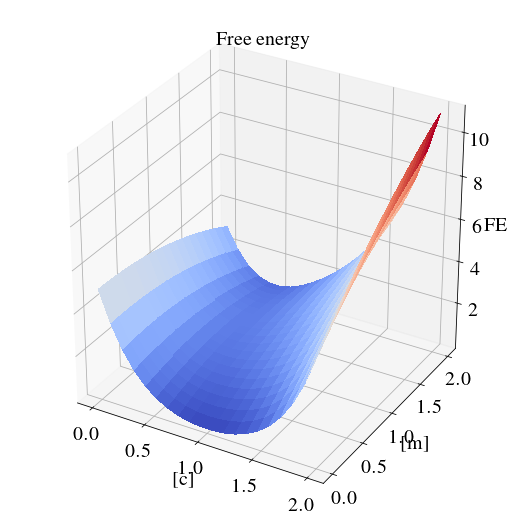

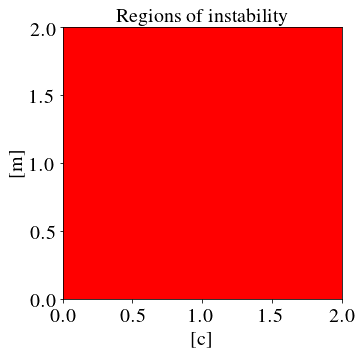

In [12]:
%matplotlib inline

parameters = {'c_0': 1.0,
              'alpha': 10.0,
              'beta': 5.0,
              'gamma': 2.0,
              'lamda': -1.0}

fe1_obj = free_energy_1(parameters)

# concentration ranges:
n_points_c = 20
c_min = 0.0
c_max = 2.0
n_points_m = 20
m_min = 0.0
m_max = 2.0
c_range = np.linspace(c_min, c_max, n_points_c)
m_range = np.linspace(m_min, m_max, n_points_m)
C, M = np.meshgrid(c_range, m_range)

# calculate free energy:
fe = fe1_obj.calculate_fe([C, M])
# plot the free energy:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)  
surf = ax.plot_surface(C, M, fe, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title("Free energy", fontsize=20)
ax.set_xlabel('[c]', fontsize=20)
ax.set_ylabel('[m]', fontsize=20)
ax.set_zlabel('FE', fontsize=20)
plt.show()

# Compute regions of instability

instability = np.zeros([n_points_c, n_points_m])

for i in range(n_points_c):
    for j in range(n_points_m):
        J = fe1_obj.calculate_jacobian([C[i,j],M[i,j]])
        eigenvalues = spl.eigvals(J)
        if eigenvalues[0] < 0.0 or eigenvalues[1] < 0.0:
            instability[i,j] = 1.0
        else:
            instability[i,j] = 0.0
            
fig, ax = plt.subplots(1,1,figsize=(5,5))
surf = ax.contourf(C, M, instability, levels=[0.5,1.5], colors=['red','blue'])
ax.set_title("Regions of instability", fontsize=20)
ax.set_xlabel('[c]', fontsize=20)
ax.set_ylabel('[m]', fontsize=20)
plt.show()

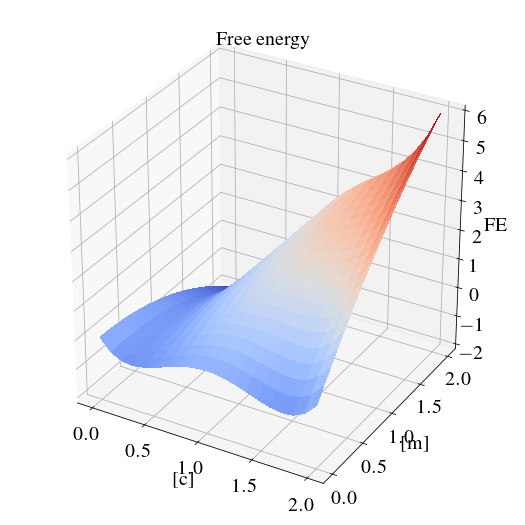

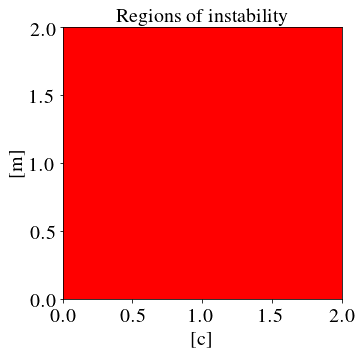

In [13]:
%matplotlib inline

parameters = {'c_0': 1.0,
              'alpha': 10.0,
              'beta': -5.0,
              'gamma': 2.0,
              'lamda': -1.0}

fe1_obj = free_energy_1(parameters)

# concentration ranges:
n_points_c = 20
c_min = 0.0
c_max = 2.0
n_points_m = 20
m_min = 0.0
m_max = 2.0
c_range = np.linspace(c_min, c_max, n_points_c)
m_range = np.linspace(m_min, m_max, n_points_m)
C, M = np.meshgrid(c_range, m_range)

# calculate free energy:
fe = fe1_obj.calculate_fe([C, M])
# plot the free energy:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)  
surf = ax.plot_surface(C, M, fe, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title("Free energy", fontsize=20)
ax.set_xlabel('[c]', fontsize=20)
ax.set_ylabel('[m]', fontsize=20)
ax.set_zlabel('FE', fontsize=20)
plt.show()

# Compute regions of instability

instability = np.zeros([n_points_c, n_points_m])

for i in range(n_points_c):
    for j in range(n_points_m):
        J = fe1_obj.calculate_jacobian([C[i,j],M[i,j]])
        eigenvalues = spl.eigvals(J)
        if eigenvalues[0] < 0.0 or eigenvalues[1] < 0.0:
            instability[i,j] = 1.0
        else:
            instability[i,j] = 0.0
            
fig, ax = plt.subplots(1,1,figsize=(5,5))
surf = ax.contourf(C, M, instability, levels=[0.5,1.5], colors=['red','blue'])
ax.set_title("Regions of instability", fontsize=20)
ax.set_xlabel('[c]', fontsize=20)
ax.set_ylabel('[m]', fontsize=20)
plt.show()